<a href="https://colab.research.google.com/github/Keerthana198917/machine-learning/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
recipes = pd.read_csv("recipes.csv")
# Load dataset
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


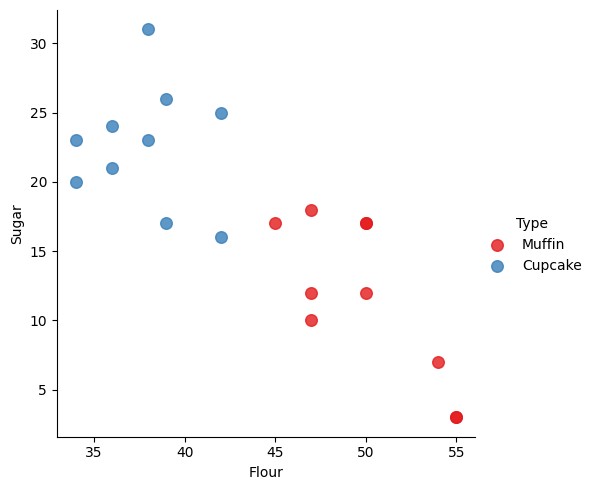

In [37]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [20]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [42]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']].values
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [ ]:
# prompt: define svm

# Train SVM
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize the decision boundary (for 2 features)
if X_train.shape[1] == 2:
  # Plot decision boundary
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))
  Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, alpha=0.8)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolors='k')
  plt.title('SVM Decision Boundary')
  plt.xlabel('Scaled Flour')
  plt.ylabel('Scaled Sugar')
  plt.show()

In [46]:
# Fit the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)


model.fit(ingredients, type_label)

SVC(kernel='linear')

In [48]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

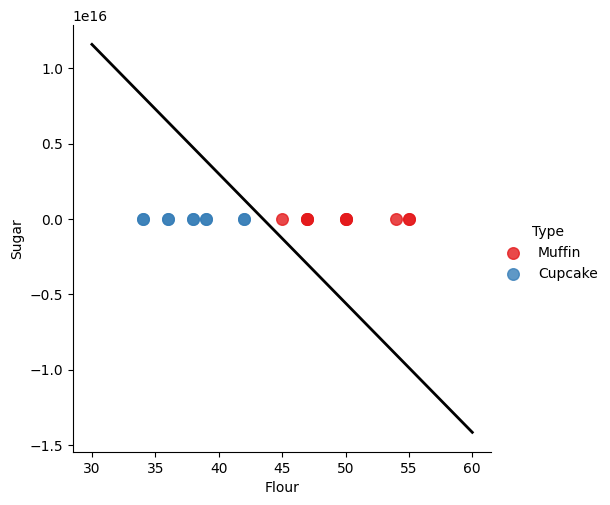

In [49]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

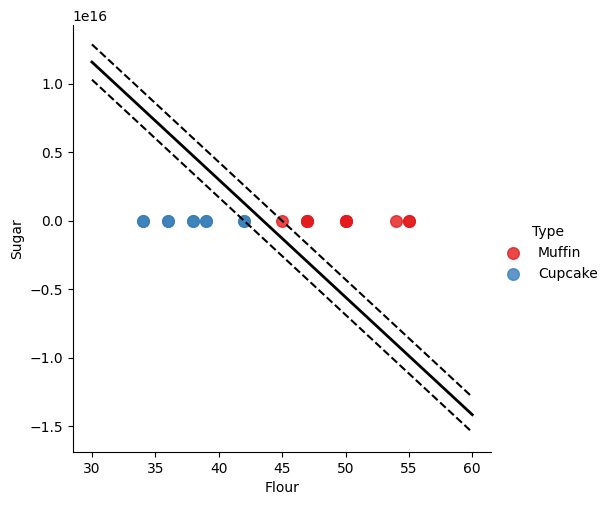

In [50]:
# Look at the margins and support vectors
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [51]:

# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [52]:

# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


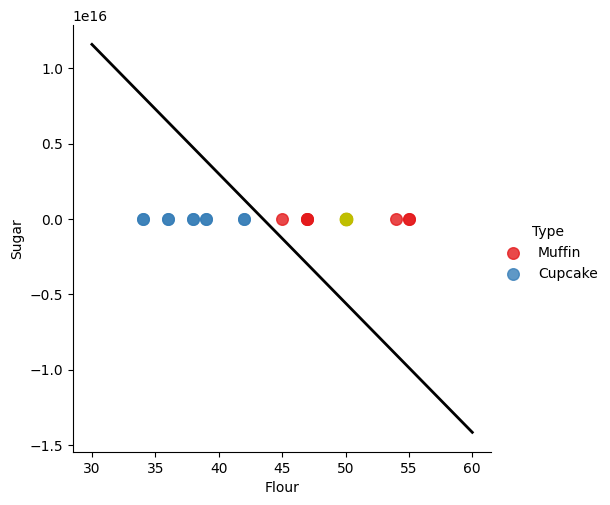

In [54]:

# Plot the point to visually see where the point lies
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

In [57]:
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}

In [58]:

muffin_cupcake_dict

{'muffin_cupcake_model': SVC(kernel='linear'),
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt']}

In [59]:
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))

In [61]:
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))

In [65]:
pickle.dumps(muffin_cupcake_dict)

b'\x80\x04\x95\xc6\x05\x00\x00\x00\x00\x00\x00}\x94(\x8c\x14muffin_cupcake_model\x94\x8c\x14sklearn.svm._classes\x94\x8c\x03SVC\x94\x93\x94)\x81\x94}\x94(\x8c\x17decision_function_shape\x94\x8c\x03ovr\x94\x8c\nbreak_ties\x94\x89\x8c\x06kernel\x94\x8c\x06linear\x94\x8c\x06degree\x94K\x03\x8c\x05gamma\x94\x8c\x05scale\x94\x8c\x05coef0\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x03tol\x94G?PbM\xd2\xf1\xa9\xfc\x8c\x01C\x94G?\xf0\x00\x00\x00\x00\x00\x00\x8c\x02nu\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x07epsilon\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\tshrinking\x94\x88\x8c\x0bprobability\x94\x89\x8c\ncache_size\x94K\xc8\x8c\x0cclass_weight\x94N\x8c\x07verbose\x94\x89\x8c\x08max_iter\x94J\xff\xff\xff\xff\x8c\x0crandom_state\x94N\x8c\x07_sparse\x94\x89\x8c\x0en_features_in_\x94K\x02\x8c\rclass_weight_\x94\x8c\x16numpy._core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x02\x85\x94h!\x8c\x05dtype\x94\x93\

In [66]:
# prompt: connect to github

#@title
#@markdown In order to use this option, you need to first authorize Colaboratory.
#@markdown This option is only available in Colaboratory.
!git config --global user.email "keerthana.t@sakec.ac.in"
#!git config --global user.name "Your Name"
